In [1]:
import numpy as np
from numba import jit ,vectorize ,f8 ,prange ,cuda
import matplotlib.pyplot as plt

In [241]:
%%file euler.py

from numba import jit
import numpy as np

@jit(nopython=True)
def euler(odefun,ics,h,span,degree):
    
    N= int( (span[1]-span[0])/h )
    
    tY = np.zeros((N+1,degree+1))
    tY[0,1:] = ics

    for  i in range(N):
        tY[i+1,0] = tY[i,0] + h
        tY[i+1,1:] = tY[i,1:] + h * odefun(tY[i,0],tY[i,1:])
        
    return tY[:,0],tY[:,1:]

Overwriting euler.py


In [240]:
%%file RK2.py

from numba import jit
import numpy as np

@jit(nopython=True)
def RK2(odefun,ics,h,span,degree):
    
    N= int( (span[1]-span[0])/h )
    
    tY = np.zeros((N+1,degree+1))
    tY[0,1:] = ics
    
    
    for  i in range(N):
        tY[i+1,0] = tY[i,0] + h

        k1= odefun(tY[i,0],tY[i,1:])
        k2= odefun(tY[i,0] +h,tY[i,1:] +(h*k1))
        
        tY[i+1,1:] = tY[i,1:] + h*(1/2) * (k1+k2)
        
    return tY[:,0],tY[:,1:]

Overwriting RK2.py


In [242]:
%%file RK3.py

from numba import jit
import numpy as np

@jit(nopython=True)
def RK3(odefun,ics,h,span,degree):
    
    N= int( (span[1]-span[0])/h )
    
    tY = np.zeros((N+1,degree+1))
    tY[0,1:] = ics
    
    
    for  i in range(N):
        tY[i+1,0] = tY[i,0] + h

        k1= odefun(tY[i,0]        ,tY[i,1:])
        k2= odefun(tY[i,0] +(h/2) ,tY[i,1:] +(h*k1)/2)
        k3= odefun(tY[i,0] +h     ,tY[i,1:] -h*k1 + 2*h*k2 )
        
        tY[i+1,1:] = tY[i,1:] + h*(1/6) * (k1+4*k2+k3)
        
    return tY[:,0],tY[:,1:]

Overwriting RK3.py


In [243]:
%%file RK4.py

from numba import jit
import numpy as np

@jit(nopython=True)
def RK4(odefun,ics,h,span,degree):
    
    N= int( (span[1]-span[0])/h )
    
    tY = np.zeros((N+1,degree+1))
    tY[0,1:] = ics
    
    
    for  i in range(N):
        tY[i+1,0] = tY[i,0] + h

        k1= odefun(tY[i,0]       , tY[i,1:])
        k2= odefun(tY[i,0] +(h/2), tY[i,1:] +(h*k1)/2 )
        k3= odefun(tY[i,0] +(h/2), tY[i,1:] +(h*k2)/2)
        k4= odefun(tY[i,0] +(h)  , tY[i,1:] +(h*k3))
        
        tY[i+1,1:] = tY[i,1:] + h*(1/6) * (k1+2*k2+2*k3+k4)
        
    return tY[:,0],tY[:,1:]

Overwriting RK4.py


In [260]:
%%file RKDP.py

from numba import jit
import numpy as np

@jit(nopython=True)
def RKDP(odefun,ics,h,span,degree):
    
    N= int( (span[1]-span[0])/h )
    
    tY = np.zeros((N+1,degree+1))
    tY[0,1:] = ics
    
    K = np.zeros((N,6))
    
    for  i in range(N):
        tY[i+1,0] = tY[i,0] + h
        
        k1= odefun(tY[i,0]            , tY[i,1:])
        k2= odefun(tY[i,0] +h *(1/5)  , tY[i,1:] +h*((k1) *(1/5)        )) 
        k3= odefun(tY[i,0] +h *(3/10) , tY[i,1:] +h*((k1) *(3/40)       + (k2) *(9/40)        ))
        k4= odefun(tY[i,0] +h *(4/5)  , tY[i,1:] +h*((k1) *(44/55)      + (k2) *(-56/15)      +(k3)*(32/9)       ))
        k5= odefun(tY[i,0] +h *(8/9)  , tY[i,1:] +h*((k1) *(19372/6561) + (k2) *(-25360/2187) +(k3)*(64448/6561) +(k4)*(-212/729) ))
        k6= odefun(tY[i,0] +h *(1)    , tY[i,1:] +h*((k1) *(9017/3186)  + (k2) *(-355/33)     +(k3)*(46732/5247) +(k4)*(49/176)   +(k5)*(-5103/18656) ))
        
        tY[i+1,1:] = tY[i,1:] +  h *( k1*(35/384) +k2*(0) +k3*(500/1113) +k4*(125/192) +k5*(-2187/6784) +k6*(11/84) )
        
       
    return tY[:,0],tY[:,1:]

Overwriting RKDP.py


In [255]:
%%file eulern.py

from numba import jit
import numpy as np

def eulern(odefun,ics,h,span,degree):
    
    N= int( (span[1]-span[0])/h )
    
    tY = np.zeros((N+1,degree+1))
    tY[0,1:] = ics

    for  i in range(N):
        tY[i+1,0] = tY[i,0] + h
        tY[i+1,1:] = tY[i,1:] + h * odefun(tY[i,0],tY[i,1:])
        
    return tY[:,0],tY[:,1:]

Writing eulern.py


In [256]:
%%file RK2n.py

import numpy as np

def RK2n(odefun,ics,h,span,degree):
    
    N= int( (span[1]-span[0])/h )
    
    tY = np.zeros((N+1,degree+1))
    tY[0,1:] = ics
    
    
    for  i in range(N):
        tY[i+1,0] = tY[i,0] + h

        k1= odefun(tY[i,0],tY[i,1:])
        k2= odefun(tY[i,0] +h,tY[i,1:] +(h*k1))
        
        tY[i+1,1:] = tY[i,1:] + h*(1/2) * (k1+k2)
        
    return tY[:,0],tY[:,1:]

Writing RK2n.py


In [13]:
%%file RK3n.py

import numpy as np

def RK3n(odefun,ics,h,span,degree):
    
    N= int( (span[1]-span[0])/h )
    
    tY = np.zeros((N+1,degree+1))
    tY[0,1:] = ics
    
    
    for  i in range(N):
        tY[i+1,0] = tY[i,0] + h

        k1= odefun(tY[i,0]        ,tY[i,1:])
        k2= odefun(tY[i,0] +(h/2) ,tY[i,1:] +(h*k1)/2)
        k3= odefun(tY[i,0] +h     ,tY[i,1:] -h*k1 + 2*h*k2 )
        
        tY[i+1,1:] = tY[i,1:] + h*(1/6) * (k1+4*k2+k3)
        
    return tY[:,0],tY[:,1:]

Writing RK3n.py


In [258]:
%%file RK4n.py

import numpy as np

def RK4n(odefun,ics,h,span,degree):
    
    N= int( (span[1]-span[0])/h )
    
    tY = np.zeros((N+1,degree+1))
    tY[0,1:] = ics
    
    
    for  i in range(N):
        tY[i+1,0] = tY[i,0] + h

        k1= odefun(tY[i,0]       , tY[i,1:])
        k2= odefun(tY[i,0] +(h/2), tY[i,1:] +(h*k1)/2 )
        k3= odefun(tY[i,0] +(h/2), tY[i,1:] +(h*k2)/2)
        k4= odefun(tY[i,0] +(h)  , tY[i,1:] +(h*k3))
        
        tY[i+1,1:] = tY[i,1:] + h*(1/6) * (k1+2*k2+2*k3+k4)
        
    return tY[:,0],tY[:,1:]

Writing RK4n.py


In [259]:
%%file RKDPn.py

import numpy as np

def RKDPn(odefun,ics,h,span,degree):
    
    N= int( (span[1]-span[0])/h )
    
    tY = np.zeros((N+1,degree+1))
    tY[0,1:] = ics
    
    K = np.zeros((N,6))
    
    for  i in range(N):
        tY[i+1,0] = tY[i,0] + h
        
        k1= odefun(tY[i,0]            , tY[i,1:])
        k2= odefun(tY[i,0] +h *(1/5)  , tY[i,1:] +h*((k1) *(1/5)        )) 
        k3= odefun(tY[i,0] +h *(3/10) , tY[i,1:] +h*((k1) *(3/40)       + (k2) *(9/40)        ))
        k4= odefun(tY[i,0] +h *(4/5)  , tY[i,1:] +h*((k1) *(44/55)      + (k2) *(-56/15)      +(k3)*(32/9)       ))
        k5= odefun(tY[i,0] +h *(8/9)  , tY[i,1:] +h*((k1) *(19372/6561) + (k2) *(-25360/2187) +(k3)*(64448/6561) +(k4)*(-212/729) ))
        k6= odefun(tY[i,0] +h *(1)    , tY[i,1:] +h*((k1) *(9017/3186)  + (k2) *(-355/33)     +(k3)*(46732/5247) +(k4)*(49/176)   +(k5)*(-5103/18656) ))
        
        tY[i+1,1:] = tY[i,1:] +  h *( k1*(35/384) +k2*(0) +k3*(500/1113) +k4*(125/192) +k5*(-2187/6784) +k6*(11/84) )
        
       
    return tY[:,0],tY[:,1:]

Writing RKDPn.py


### Test performance

In [18]:
#test function

@jit(nopython=True)
def vdpi(t,y):
    return np.array([y[1],(1-y[0]**2)*y[1]-y[0]])


def vdpin(t,y):
    return np.array([y[1],(1-y[0]**2)*y[1]-y[0]])

In [38]:
from RK2 import *
from RK3 import *
from RK4 import *
from RKDP import *
from euler import *

from RK2n import *
from RK3n import *
from RK4n import *
from RKDPn import *
from eulern import *

eulerD,eulernD,RK2D,RK2nD,RK3D,RK3nD,RK4D,RK4nD,RKDPD,RKDPnD = {},{},{},{},{},{},{},{},{},{}


t = [ [[]]*4 for i in range(15)]

for i in range(5):
    
    
    h=10**-(i+1)

    print('h=',h)
    
    #Numba
    t[0][i] = %timeit -o t,y=euler(vdpi,ics=np.array([2,0]),h=h,span=np.array([0,20]),degree =2)
    t[1][i] = %timeit -o t,y=RK2(vdpi,ics=np.array([2,0]),h=h,span=np.array([0,20]),degree =2)
    t[2][i] = %timeit -o t,y=RK3(vdpi,ics=np.array([2,0]),h=h,span=np.array([0,20]),degree =2)
    t[3][i] = %timeit -o t,y=RK4(vdpi,ics=np.array([2,0]),h=h,span=np.array([0,20]),degree =2)
    t[4][i] = %timeit -o t,y=RKDP(vdpi,ics=np.array([2,0]),h=h,span=np.array([0,20]),degree =2)

    #numpy
    t[5][i] = %timeit -o t,y=eulern(vdpin,ics=np.array([2,0]),h=h,span=np.array([0,20]),degree =2)
    t[6][i] = %timeit -o t,y=RK2n(vdpin,ics=np.array([2,0]),h=h,span=np.array([0,20]),degree =2)
    t[7][i] = %timeit -o t,y=RK3n(vdpin,ics=np.array([2,0]),h=h,span=np.array([0,20]),degree =2)
    t[8][i] = %timeit -o t,y=RK4n(vdpin,ics=np.array([2,0]),h=h,span=np.array([0,20]),degree =2)
    t[9][i] = %timeit -o t,y=RKDPn(vdpin,ics=np.array([2,0]),h=h,span=np.array([0,20]),degree =2)


h= 0.1
66.9 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
114 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
157 µs ± 3.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
201 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
308 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.43 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.87 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.03 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.21 ms ± 575 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.4 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
h= 0.01
541 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.04 ms ± 17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.55 ms ± 42.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.05 ms ± 85.7 µs per loop (mean ± std. dev. of 

IndexError: list assignment index out of range

In [99]:
matlab=    [
    [0.0008,    0.0079,    0.0806,    0.8443],
    [0.0016,    0.0139,    0.1281,    1.3238],
    [0.0019,    0.0183,    0.1776,    1.7806],
    [0.0027,    0.0224,    0.2269,    2.2611],
    [0.0034,    0.0322,    0.3242,    3.3330]
    ]

In [55]:
# tc=t.copy()
# for i,itemi in enumerate(tc):
#     for j,itemj in enumerate(itemi):
#         tc[i][j] = itemj.average
#         print(itemj)
times = np.array(t[:-5])

In [100]:
alltimes= np.concatenate((times,matlab),axis=0)

In [62]:
###Matplotlib styles
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 


import matplotlib as mpl
mpl.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# mpl.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['axes.linewidth'] = 2

In [104]:

np.savetxt("numpynumbamatlabode.csv", alltimes, delimiter=",")
alltimes

array([[6.688844285714432e-05, 0.0005407017857142559,
        0.006106152714285469, 0.05758542428571413],
       [0.00011412384999999696, 0.0010421039285714805,
        0.011617191857142512, 0.10817342142857211],
       [0.00015654998999999796, 0.0015531517714285719,
        0.01625408085714298, 0.16598832285714837],
       [0.0002009441571427877, 0.0020513164285716813,
        0.025015630000000653, 0.2113200571427894],
       [0.0003078221714285974, 0.003081372428571285,
        0.033967405714286414, 0.32320691428568743],
       [0.0014325330714286143, 0.01672791285714311, 0.16450065857143273,
        1.4911805714285558],
       [0.002874345142857432, 0.030880288571415806, 0.32702025714297633,
        2.845378371428654],
       [0.005030440999999947, 0.054709992857150225, 0.565171071428592,
        5.28158962857138],
       [0.007205337714285958, 0.06657416142856423, 0.7020458000000482,
        6.733786585714175],
       [0.014442225285714747, 0.13207043571428584, 1.3946142714287038,


In [68]:
alltimes[:][0]

array([6.688844285714432e-05, 0.0005407017857142559, 0.006106152714285469,
       0.05758542428571413], dtype=object)

([<matplotlib.axis.XTick at 0x2641999d548>,
 <a list of 4 Text major ticklabel objects>)

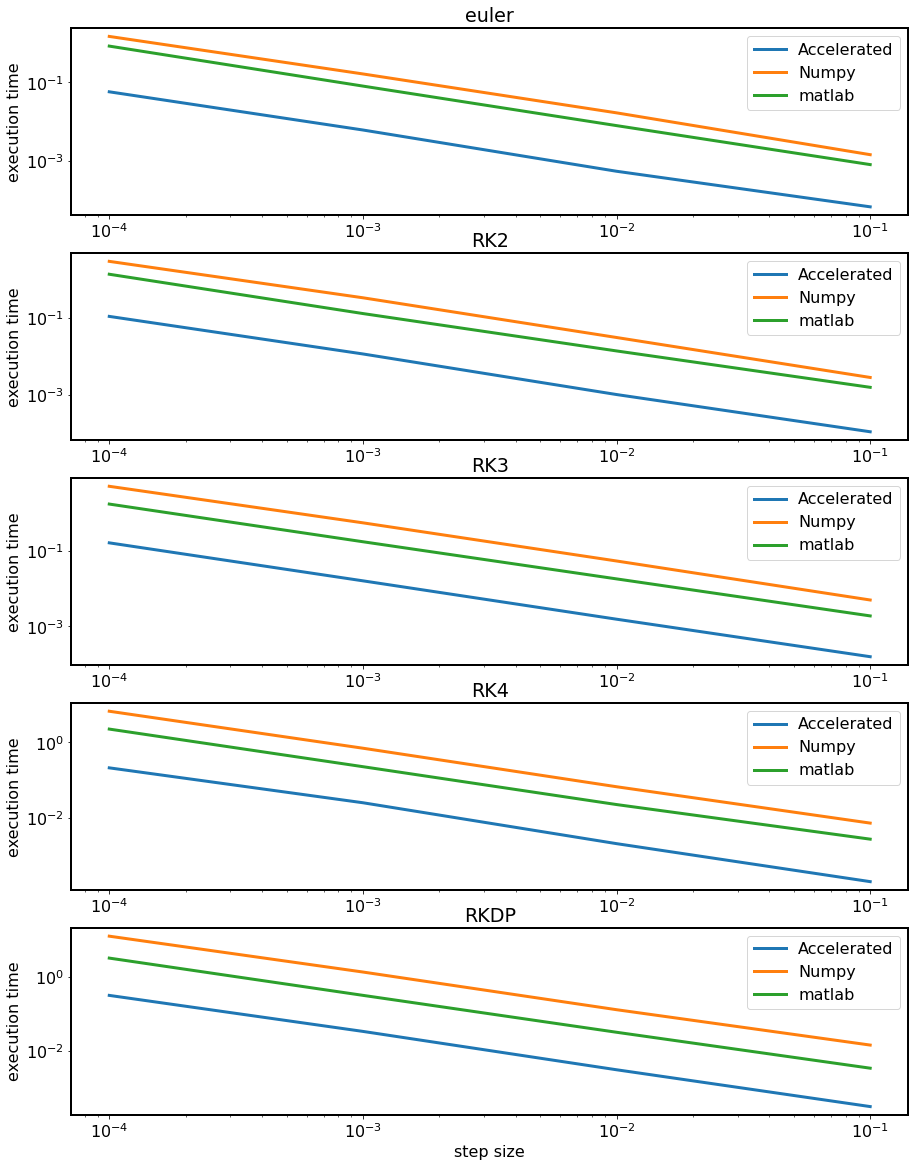

In [114]:
plt.figure(figsize=(15,20))

plt.subplot(5,1,1)

plt.loglog([0.1,0.01,0.001,0.0001],alltimes[0,:],linewidth=3)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[5,:],linewidth=3)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[10,:],linewidth=3)
plt.title('euler')
plt.ylabel('execution time');
plt.legend(['Accelerated' , 'Numpy','matlab'])

plt.subplot(5,1,2)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[1,:],linewidth=3)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[6,:],linewidth=3)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[11,:],linewidth=3)
plt.title('RK2')
plt.ylabel('execution time');
plt.legend(['Accelerated' , 'Numpy','matlab'])

plt.subplot(5,1,3)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[2,:],linewidth=3)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[7,:],linewidth=3)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[12,:],linewidth=3)
plt.title('RK3')
plt.ylabel('execution time');
plt.legend(['Accelerated' , 'Numpy','matlab'])

plt.subplot(5,1,4)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[3,:],linewidth=3)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[8,:],linewidth=3)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[13,:],linewidth=3)
plt.title('RK4')
plt.ylabel('execution time');
plt.legend(['Accelerated' , 'Numpy','matlab'])

plt.subplot(5,1,5)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[4,:],linewidth=3)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[9,:],linewidth=3)
plt.loglog([0.1,0.01,0.001,0.0001],alltimes[14,:],linewidth=3)
plt.title('RKDP')
plt.ylabel('execution time');
plt.legend(['Accelerated' , 'Numpy','matlab'])
plt.xlabel('step size')

plt.xticks([0.1,0.01,0.001,0.0001])

In [112]:
np.average(alltimes[10:15,:] / alltimes[0:5,:],axis =1 )

array([13.608087846056232, 12.6556937907936, 11.393234706456495,
       11.03164964958499, 10.337987656053205], dtype=object)